# K-Means Clustering
For the given 'Iris' dataset , We are predicting the optimum number of clusters and represent it visually

# Importing all libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm

# Reading the dataset

In [12]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# Defining the independent and dependent variables

In [13]:
X = iris.data[:, :2]
y = iris.target

# Scatter Plot

Text(0, 0.5, 'Sepal Width')

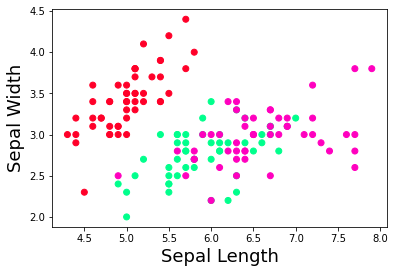

In [14]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

# Instantiating and fitting the K-Means cluster model. We have 3 clusters and a random state of 21

In [15]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

# Identifying the center point of the data

In [16]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


# Finding the optimum number of clusters for K-Means classification

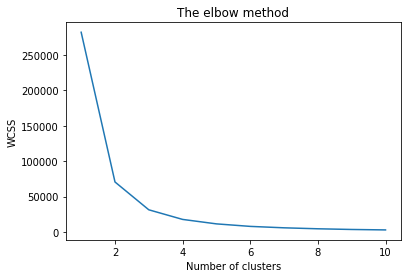

In [17]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the elbow method graph the optimum clusters is where the elbow occurs. This is when the within clusters sum of squares(WCSS) doesn't decrese significantly with every iteration

From this we choose number of clusters as '3'

# Creating K-Means Classifier

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters

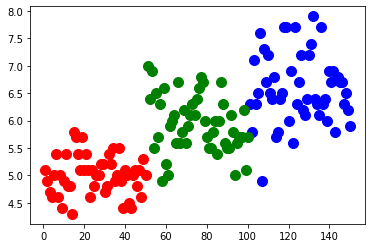

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

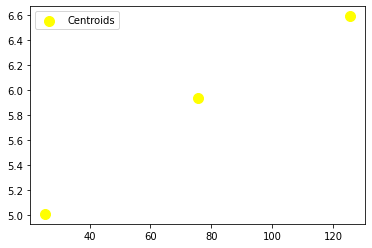

In [20]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Plot the identified clusters and compare with the answers

Text(0.5, 1.0, 'Predicted')

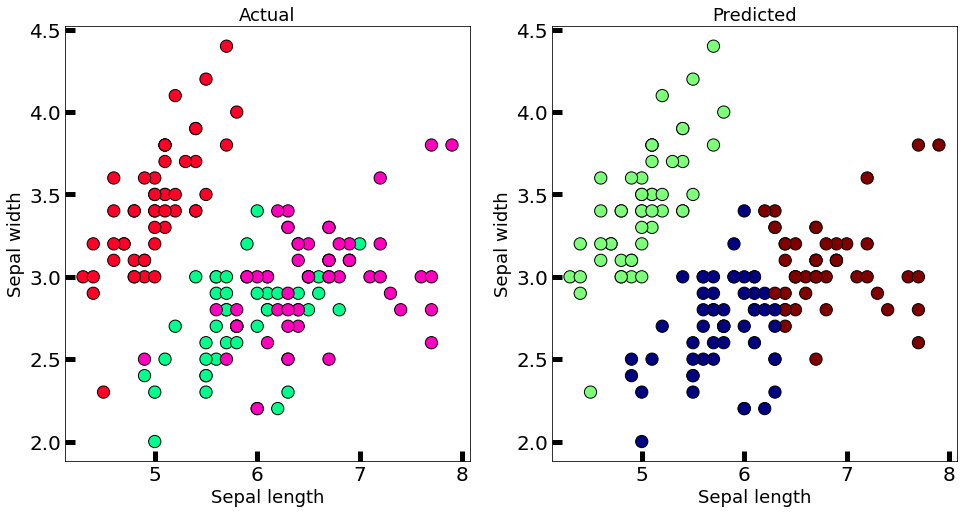

In [21]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [22]:
df = pd.DataFrame({'sepal length (cm)': iris.data[:,0], 'sepal width (cm)': iris.data[:,1], 'cluster': iris.target})
df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [23]:
centroids={}
for i in range(3):
  result_list=[]
  result_list.append(df.loc[df['cluster']==i]['sepal length (cm)'].mean())
  result_list.append(df.loc[df['cluster']==i]['sepal width (cm)'].mean())
  centroids[i]=result_list

In [24]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

# Plotting Datapoints

No handles with labels found to put in legend.


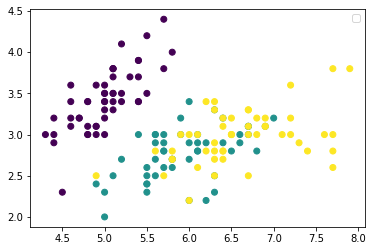

In [25]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=iris.target)
plt.legend()

# Plotting Centroid

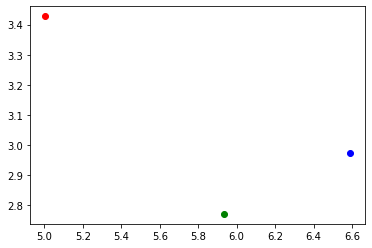

In [26]:
colmap={0: 'r', 1: 'g', 2:'b'}
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.show()

# Plotting data with centroid

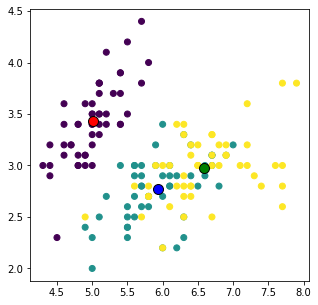

In [27]:
#plotting data point with there centroid
fig=plt.figure(figsize=(5,5))
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=iris.target)
col=[0,1]
colmap={0: 'r', 1: 'b', 2:'g'}
for i in range(3):
  plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i],edgecolors='k', s=100) 
plt.show()

In [28]:
def distance(df,centroids):
  for i in range(3):
    df['distance_from{}'.format(i)] =(np.sqrt((df['sepal length (cm)']-centroids[i][0]) **2 + (df['sepal width (cm)']-centroids[i][1])**2))
  return df

In [29]:
df=distance(df,centroids)
df

,sepal length (cm),sepal width (cm),cluster,distance_from0,distance_from1,distance_from2
0,5.1,3.5,0,0.118406,1.109863,1.578233
1,4.9,3.0,0,0.440931,1.061224,1.688200
2,4.7,3.2,0,0.381602,1.308662,1.901478
3,4.6,3.1,0,0.521939,1.376153,1.991989
4,5.0,3.6,0,0.172105,1.250998,1.706933
5,5.4,3.9,0,0.614833,1.250678,1.506260
6,4.6,3.4,0,0.406964,1.477090,2.033131
7,5.0,3.4,0,0.028636,1.128271,1.644147
8,4.4,2.9,0,0.803754,1.541491,2.189251
9,4.9,3.1,0,0.344703,1.087288,1.692696


In [30]:
centroid_distance_cols=['distance_from{}'.format(i) for i in range(3)]
df['closest_centroid']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
df['closest_centroid']=df['closest_centroid'].map(lambda x: int(x.lstrip('distance_from')))
df['color']=df['closest_centroid'].map(lambda x: colmap[x])

In [31]:
df

,sepal length (cm),sepal width (cm),cluster,distance_from0,distance_from1,distance_from2,closest_centroid,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
5,5.4,3.9,0,0.614833,1.250678,1.506260,0,r
6,4.6,3.4,0,0.406964,1.477090,2.033131,0,r
7,5.0,3.4,0,0.028636,1.128271,1.644147,0,r
8,4.4,2.9,0,0.803754,1.541491,2.189251,0,r
9,4.9,3.1,0,0.344703,1.087288,1.692696,0,r


# Visualising the clusters - On the first two columns

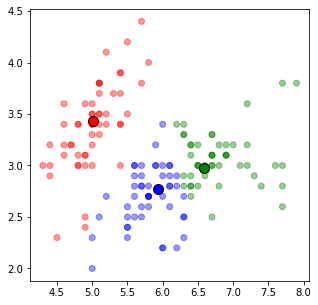

In [32]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['color'],alpha=0.4)
for i in range(3):
  plt.scatter(*centroids[i],color=colmap[i],s=100,edgecolors='k')
plt.show()